# Minería de Datos - LAB 01
**Programadores:** 
* Diego Rosales
* Diego López
* Erick War


**Fecha:** 3 de febrero de 2026
**Descripción:** Análisis exploratorio del dataset movies_2026.csv.

## Librerías a utilizar
- **NumPy:** operaciones numéricas.
- **Pandas:** carga y manipulación de datos.
- **Matplotlib:** visualización básica.
- **SciPy / Stats:** pruebas estadísticas y distribuciones.
- **Statsmodels:** diagnósticos y modelos estadísticos.

In [63]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, probplot, shapiro, kstest, spearmanr
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

## Configuración inicial
- Ajustes de visualización de columnas y filas.
- Lectura del archivo de datos (movies_2026.csv).

In [64]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Leer dataset
datos=pd.read_csv("data/movies_2026.csv", encoding='latin-1') 


## EJERCICIO 1: Exploración Rápida (3 puntos)

#### 1. Información Básica del Dataset

In [65]:
# Dimensiones del dataset
filas, columnas = datos.shape
total_celdas = filas * columnas

print("=" * 80)
print("DIMENSIONES DEL DATASET")
print("=" * 80)
print(f"Número de filas:      {filas:,}")
print(f"Número de columnas:   {columnas}")
print(f"Total de celdas:      {total_celdas:,}")
print()


DIMENSIONES DEL DATASET
Número de filas:      19,883
Número de columnas:   28
Total de celdas:      556,724



In [66]:
# Información detallada del dataset
print("=" * 80)
print("INFORMACIÓN DETALLADA (df.info())")
print("=" * 80)
datos.info()


INFORMACIÓN DETALLADA (df.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharac

In [67]:
# Primeras 5 filas
print("\n" + "=" * 80)
print("PRIMERAS 5 FILAS")
print("=" * 80)
datos.head()



PRIMERAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,Javad Hakami,Mohsen Ghasabian|Aida Mahiani|Mehran Ghafouria...,0.3453|0.1664|0.9684|0.3437|0.3713|0.2437|0.27...,|||||||,ØºÙØ·Ù ÙØ±,Immersed,fa,0.0357,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,Kimmy Gatewood,Kameron Jackson|Laura Weaving|sara weaving|Ber...,0|0.0071|0|0,Prince Charming|Evil Stepmother|Fairy Godmothe...,Cinderella,Cinderella,en,0.0357,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,Kimmy Gatewood,Cedric Mitchell|Cajun mills|Laura Williams,0.0193|0|0.0143,Aladdin|Jafar|Jasmine,Aladdin,Aladdin,en,0.0214,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,Felipe RoldÃ¡n,TomÃ¡s Tuchsznajder|Matias Junas|Martin Etchev...,0|0|0|0|0|0|0,||||||,EL ANILLO Y EL DECK,THE RING AND THE DECK,es,0.0429,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,Kimmy Gatewood,Cedric Mitchell|Tara Carpenter|Alissa Carter,0.0193|0.0071|0,Caleb|Sarah|Commander Vex,Crimson High 3,Crimson High 3,en,0.0379,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [68]:
# Últimas 5 filas
print("\n" + "=" * 80)
print("ÚLTIMAS 5 FILAS")
print("=" * 80)
datos.tail()



ÚLTIMAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
19878,920081,0.0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,Mario N. Bonassin,Eric Roberts|Emilia Torello|Joe Herrera|Michel...,18.185|0.828|0.6|0.6|0.6|1.102|3.069|0.6|0.6|0.6,Dr. Malone|Grace|Joaquin|Allison|Rex|Jason|Rit...,Megaboa,Megaboa,en,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0,2021.0
19879,920143,0.0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,Rodrigo Triana,Amparo Grisales|Jhon Álex Toro|Chichila Navia|...,1.55|0.84|0.6|0.6|0.6|0.6|0.6|0.6,La abuela - Raquel|El papá|La mamá|Sarita|El h...,El paseo 6,El Paseo 6,es,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0,2021.0
19880,922017,0.0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,Niyi Akinmolayan,Shaffy Bello-Akinrimisi|Funke Akindele|Joke Si...,0.6|0.98|0.6|0.6|0.6|0.6|0.6|0.6|1.4|0.6|0.6|1...,||||||||||||||||,Chief Daddy 2: Going for Broke,Chief Daddy 2: Going for Broke,en,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,922017.0,2021.0
19881,922162,0.0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,NaN,NaN,NaN,922162,The Witcher: Fireplace,The Witcher: Fireplace,en,9.664,2021-12-17,6.0,1,1,0,0,0,922162.0,NaN,2021.0
19882,922260,254056.0,Mystery|Thriller|Horror,NaN,Central Partnership|KIT Film Studio,RU|RU,Russia,254042.0,0,NaN,Alexandr Babaev,FALSE,7.402|3.103|8.74|7.158|2.951|0.6|1.214|9.197,|||||||,Row 19,Row 19,ru,83.747,2021-11-11,4.7,3,3,2,1,8,4.0,3.0,2021.0


#### 2. Estadísticas Descriptivas

In [69]:
# Estadísticas descriptivas para variables numéricas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
print(datos.describe().to_string())


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
                 id        budget       revenue       runtime    popularity       voteAvg     voteCount  genresAmount  productionCoAmount  productionCountriesAmount   actorsAmount  castWomenAmount  castMenAmount   releaseYear
count  1.988300e+04  1.988300e+04  1.988300e+04  19883.000000  19883.000000  19883.000000  19883.000000  19883.000000        19883.000000               19883.000000   19883.000000     19846.000000   19721.000000  19881.000000
mean   9.022402e+05  9.413280e+06  2.879213e+07     66.093799     26.248842      3.837069    675.927325      1.949253            1.972539                   1.230247    1082.049640      3516.505996    8224.352061   2016.827222
std    6.848978e+05  2.774781e+07  1.109805e+08     50.089055    156.067177      3.397705   1938.194656      1.256225            2.312075                   2.244688   26402.818732     47768.661984   71257.943156     12.838005
min    5.000000e+00  0.000000e+00  0.000000e+00 

In [70]:
# Estadísticas descriptivas para variables categóricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
print(datos.describe(include='object').to_string())



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
             genres                                   homePage productionCompany productionCompanyCountry         productionCountry  video          director actors actorsPopularity actorsCharacter originalTitle       title originalLanguage releaseDate
count         17918                                       5607             14223                    11473                     16009  19397             18907  17282            17275           17048         19882       19882            19883       19881
unique         2827                                       5487             12232                     2744                      1406      2             13668  16733            15134           14968         19507       19385               94        5663
top     Documentary  https://watch.njpwworld.com/details/60769         Paramount                       US  United States of America  False  Steven Spielberg  FALSE                0             

In [71]:
# Tabla resumen de tipos de datos
print("\n" + "=" * 80)
print("RESUMEN DE TIPOS DE DATOS")
print("=" * 80)
tipos_datos = datos.dtypes.value_counts().sort_values(ascending=False)
tabla_tipos = pd.DataFrame({
    'Tipo de Dato': tipos_datos.index.astype(str),
    'Conteo': tipos_datos.values
})
print(tabla_tipos.to_string(index=False))



RESUMEN DE TIPOS DE DATOS
Tipo de Dato  Conteo
      object      14
       int64       7
     float64       7


#### 2.1 Estadísticas de Variables Multivaluadas
El dataset contiene variables que almacenan múltiples valores separados por tuberías (`|`). A continuación, se presenta un análisis específico para estas columnas.


In [72]:
# Definición de variables multivaluadas
cols_multivaluadas_cat = ['genres', 'productionCompany', 'productionCompanyCountry', 'actors', 'actorsCharacter']
cols_multivaluadas_num = ['actorsPopularity']

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS")
print("=" * 80)

def analizar_multivaluado_cat(df, col, sep='|', top_n=10):
    if col not in df.columns:
        return
    
    print(f"\nANÁLISIS VARIABLE: {col}")
    print("-" * 40)
    
    # Separar y explotar
    series_str = df[col].astype(str)
    valores = series_str.str.split(sep).explode()
    
    # Limpieza: eliminar vacíos y 'nan'
    valores = valores[valores.str.strip().str.len() > 0]
    valores = valores[valores != 'nan']
    
    total_unicos = valores.nunique()
    total_items = len(valores)
    promedio_items = total_items / len(df) if len(df) > 0 else 0
    
    print(f"  Total de elementos únicos:      {total_unicos:,}")
    print(f"  Total de ocurrencias:           {total_items:,}")
    print(f"  Promedio de elementos por fila: {promedio_items:.2f}")
    
    if total_unicos > 0:
        print(f"\n  Top {top_n} valores más frecuentes:")
        conteo = valores.value_counts().head(top_n)
        df_conteo = pd.DataFrame({
            'Valor': conteo.index, 
            'Frecuencia': conteo.values,
            '% Total Items': (conteo.values / total_items * 100).round(2)
        })
        print(df_conteo.to_string(index=False))

# Ejecutar análisis categórico
for col in cols_multivaluadas_cat:
    analizar_multivaluado_cat(datos, col)

# Análisis para actorsPopularity (Numérico multivaluado)
if 'actorsPopularity' in datos.columns:
    print(f"\nANÁLISIS VARIABLE: actorsPopularity (Numérico)")
    print("-" * 40)
    
    # Separar, convertir a numérico y explotar
    pop_vals = datos['actorsPopularity'].astype(str).str.split('|').explode()
    pop_vals_num = pd.to_numeric(pop_vals, errors='coerce')
    pop_vals_num = pop_vals_num.dropna()
    
    if len(pop_vals_num) > 0:
        print(f"  Cantidad de valores válidos: {len(pop_vals_num):,}")
        print(f"  Promedio:                    {pop_vals_num.mean():.4f}")
        print(f"  Mediana:                     {pop_vals_num.median():.4f}")
        print(f"  Desviación Estándar:         {pop_vals_num.std():.4f}")
        print(f"  Mínimo:                      {pop_vals_num.min():.4f}")
        print(f"  Máximo:                      {pop_vals_num.max():.4f}")
        
        # Cuartiles
        q1, q2, q3 = np.percentile(pop_vals_num, [25, 50, 75])
        print(f"  Cuartiles (25%, 50%, 75%):   [{q1:.4f}, {q2:.4f}, {q3:.4f}]")
    else:
        print("  No se encontraron valores numéricos válidos.")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS

ANÁLISIS VARIABLE: genres
----------------------------------------
  Total de elementos únicos:      19
  Total de ocurrencias:           38,643
  Promedio de elementos por fila: 1.94

  Top 10 valores más frecuentes:
      Valor  Frecuencia  % Total Items
      Drama        6561          16.98
     Comedy        4796          12.41
   Thriller        3384           8.76
     Action        3041           7.87
Documentary        2432           6.29
     Horror        2404           6.22
  Adventure        2005           5.19
    Romance        2001           5.18
  Animation        1980           5.12
     Family        1741           4.51

ANÁLISIS VARIABLE: productionCompany
----------------------------------------
  Total de elementos únicos:      15,517
  Total de ocurrencias:           37,943
  Promedio de elementos por fila: 1.91

  Top 10 valores más frecuentes:
                Valor  Frecuencia  % Total Items
Warner Bros. Pict

#### 3. Análisis de Valores Faltantes

In [73]:
# Análisis de valores faltantes
missing_analysis = pd.DataFrame({
    'Variable': datos.columns,
    'Valores_Faltantes': datos.isnull().sum().values,
    'Porcentaje': (datos.isnull().sum() / len(datos) * 100).round(2).values,
    'Tipo_Dato': datos.dtypes.values
})

# Filtrar solo variables con faltantes
missing_with_values = missing_analysis[missing_analysis['Valores_Faltantes'] > 0].sort_values(
    'Valores_Faltantes', ascending=False
)

print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)")
print("=" * 80)
if len(missing_with_values) > 0:
    print(missing_with_values.to_string(index=False))
else:
    print("No hay valores faltantes en el dataset")


ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)
                Variable  Valores_Faltantes  Porcentaje Tipo_Dato
                homePage              14276       71.80    object
productionCompanyCountry               8410       42.30    object
       productionCompany               5660       28.47    object
       productionCountry               3874       19.48    object
         actorsCharacter               2835       14.26    object
        actorsPopularity               2608       13.12    object
                  actors               2601       13.08    object
                  genres               1965        9.88    object
                director                976        4.91    object
                   video                486        2.44    object
           castMenAmount                162        0.81   float64
         castWomenAmount                 37        0.19   float64
             releaseDate                  2        0.01    object
             r

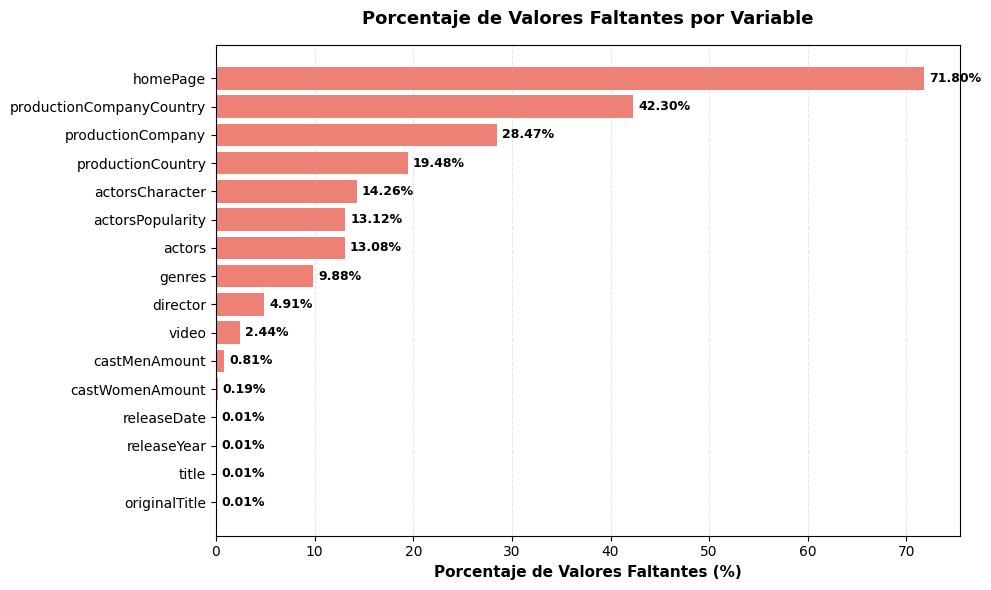

In [74]:
# Gráfico de barras horizontales de valores faltantes
if len(missing_with_values) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    y_pos = np.arange(len(missing_with_values))
    ax.barh(y_pos, missing_with_values['Porcentaje'].values, color='#e74c3c', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(missing_with_values['Variable'].values, fontsize=10)
    ax.invert_yaxis()
    
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=11, fontweight='bold')
    ax.set_title('Porcentaje de Valores Faltantes por Variable', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Añadir valores en las barras
    for i, (idx, row) in enumerate(missing_with_values.iterrows()):
        ax.text(row['Porcentaje'] + 0.5, i, f"{row['Porcentaje']:.2f}%", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


#### 4. Análisis de Valores Duplicados

In [75]:
# Análisis de duplicados
duplicados = datos.duplicated().sum()
porcentaje_duplicados = (duplicados / len(datos)) * 100

print("=" * 80)
print("ANÁLISIS DE VALORES DUPLICADOS")
print("=" * 80)
print(f"Número de filas duplicadas:     {duplicados:,}")
print(f"Porcentaje de duplicados:       {porcentaje_duplicados:.2f}%")
print(f"Filas únicas:                   {len(datos) - duplicados:,}")


ANÁLISIS DE VALORES DUPLICADOS
Número de filas duplicadas:     0
Porcentaje de duplicados:       0.00%
Filas únicas:                   19,883


#### 5. Resumen de Variables Clave

In [76]:
# Resumen de variables clave
print("=" * 80)
print("RESUMEN DE VARIABLES CLAVE")
print("=" * 80)

# Año de lanzamiento
if 'releaseYear' in datos.columns:
    print(f"\nAÑO DE LANZAMIENTO (releaseYear)")
    print(f"  Año mínimo:                 {datos['releaseYear'].min():.0f}")
    print(f"  Año máximo:                 {datos['releaseYear'].max():.0f}")

# Presupuesto
if 'budget' in datos.columns:
    print(f"\nPRESUPUESTO (budget)")
    print(f"  Promedio:                   ${datos['budget'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['budget'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['budget'].min():,.2f}")
    print(f"  Máximo:                     ${datos['budget'].max():,.2f}")

# Ingresos
if 'revenue' in datos.columns:
    print(f"\nINGRESOS (revenue)")
    print(f"  Promedio:                   ${datos['revenue'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['revenue'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['revenue'].min():,.2f}")
    print(f"  Máximo:                     ${datos['revenue'].max():,.2f}")

# Calificaciones
if 'voteAvg' in datos.columns:
    print(f"\nCALIFICACIONES (voteAvg)")
    print(f"  Promedio:                   {datos['voteAvg'].mean():.2f}")
    print(f"  Mediana:                    {datos['voteAvg'].median():.2f}")
    print(f"  Mínimo:                     {datos['voteAvg'].min():.2f}")
    print(f"  Máximo:                     {datos['voteAvg'].max():.2f}")

# Votos
if 'voteCount' in datos.columns:
    print(f"\nVOTOS (voteCount)")
    print(f"  Promedio:                   {datos['voteCount'].mean():,.0f}")
    print(f"  Mediana:                    {datos['voteCount'].median():,.0f}")
    print(f"  Máximo:                     {datos['voteCount'].max():,.0f}")

# Popularidad
if 'popularity' in datos.columns:
    print(f"\nPOPULARIDAD (popularity)")
    print(f"  Promedio:                   {datos['popularity'].mean():.2f}")
    print(f"  Mediana:                    {datos['popularity'].median():.2f}")
    print(f"  Máximo:                     {datos['popularity'].max():.2f}")

# Runtime
if 'runtime' in datos.columns:
    print(f"\nDURAÓN (runtime - minutos)")
    print(f"  Promedio:                   {datos['runtime'].mean():.2f} minutos")
    print(f"  Mediana:                    {datos['runtime'].median():.2f} minutos")
    print(f"  Mínimo:                     {datos['runtime'].min():.0f} minutos")
    print(f"  Máximo:                     {datos['runtime'].max():.0f} minutos")


RESUMEN DE VARIABLES CLAVE

AÑO DE LANZAMIENTO (releaseYear)
  Año mínimo:                 1902
  Año máximo:                 2026

PRESUPUESTO (budget)
  Promedio:                   $9,413,279.82
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $380,000,000.00

INGRESOS (revenue)
  Promedio:                   $28,792,133.68
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $2,847,246,203.00

CALIFICACIONES (voteAvg)
  Promedio:                   3.84
  Mediana:                    5.40
  Mínimo:                     0.00
  Máximo:                     10.00

VOTOS (voteCount)
  Promedio:                   676
  Mediana:                    6
  Máximo:                     30,788

POPULARIDAD (popularity)
  Promedio:                   26.25
  Mediana:                    8.50
  Máximo:                     11474.65

DURAÓN (runtime - minutos)
  Promedio:                   66.09 minutos
  M

#### 6. Análisis de Calidad de Datos

In [77]:
# Análisis de calidad de datos
print("=" * 80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 80)

# Películas con budget = 0
if 'budget' in datos.columns:
    budget_zero = (datos['budget'] == 0).sum()
    pct_budget_zero = (budget_zero / len(datos)) * 100
    print(f"\nPelículas con presupuesto = 0:")
    print(f"  Cantidad:                   {budget_zero:,}")
    print(f"  Porcentaje:                 {pct_budget_zero:.2f}%")

# Películas con revenue = 0
if 'revenue' in datos.columns:
    revenue_zero = (datos['revenue'] == 0).sum()
    pct_revenue_zero = (revenue_zero / len(datos)) * 100
    print(f"\nPelículas con ingresos = 0:")
    print(f"  Cantidad:                   {revenue_zero:,}")
    print(f"  Porcentaje:                 {pct_revenue_zero:.2f}%")

# Películas con runtime = 0
if 'runtime' in datos.columns:
    runtime_zero = (datos['runtime'] == 0).sum()
    pct_runtime_zero = (runtime_zero / len(datos)) * 100
    print(f"\nPelículas con duración = 0:")
    print(f"  Cantidad:                   {runtime_zero:,}")
    print(f"  Porcentaje:                 {pct_runtime_zero:.2f}%")

# Películas con voteCount = 0
if 'voteCount' in datos.columns:
    votecount_zero = (datos['voteCount'] == 0).sum()
    pct_votecount_zero = (votecount_zero / len(datos)) * 100
    print(f"\nPelículas con votos = 0:")
    print(f"  Cantidad:                   {votecount_zero:,}")
    print(f"  Porcentaje:                 {pct_votecount_zero:.2f}%")


ANÁLISIS DE CALIDAD DE DATOS

Películas con presupuesto = 0:
  Cantidad:                   13,281
  Porcentaje:                 66.80%

Películas con ingresos = 0:
  Cantidad:                   14,485
  Porcentaje:                 72.85%

Películas con duración = 0:
  Cantidad:                   2,951
  Porcentaje:                 14.84%

Películas con votos = 0:
  Cantidad:                   8,302
  Porcentaje:                 41.75%


## EJERCICIO 3: Normalidad de variables cuantitativas y tabla de frecuencias de variables cualitativas (6 puntos)

### 3.1 Análisis de Normalidad de Variables Cuantitativas

ANÁLISIS DE NORMALIDAD - GRÁFICOS


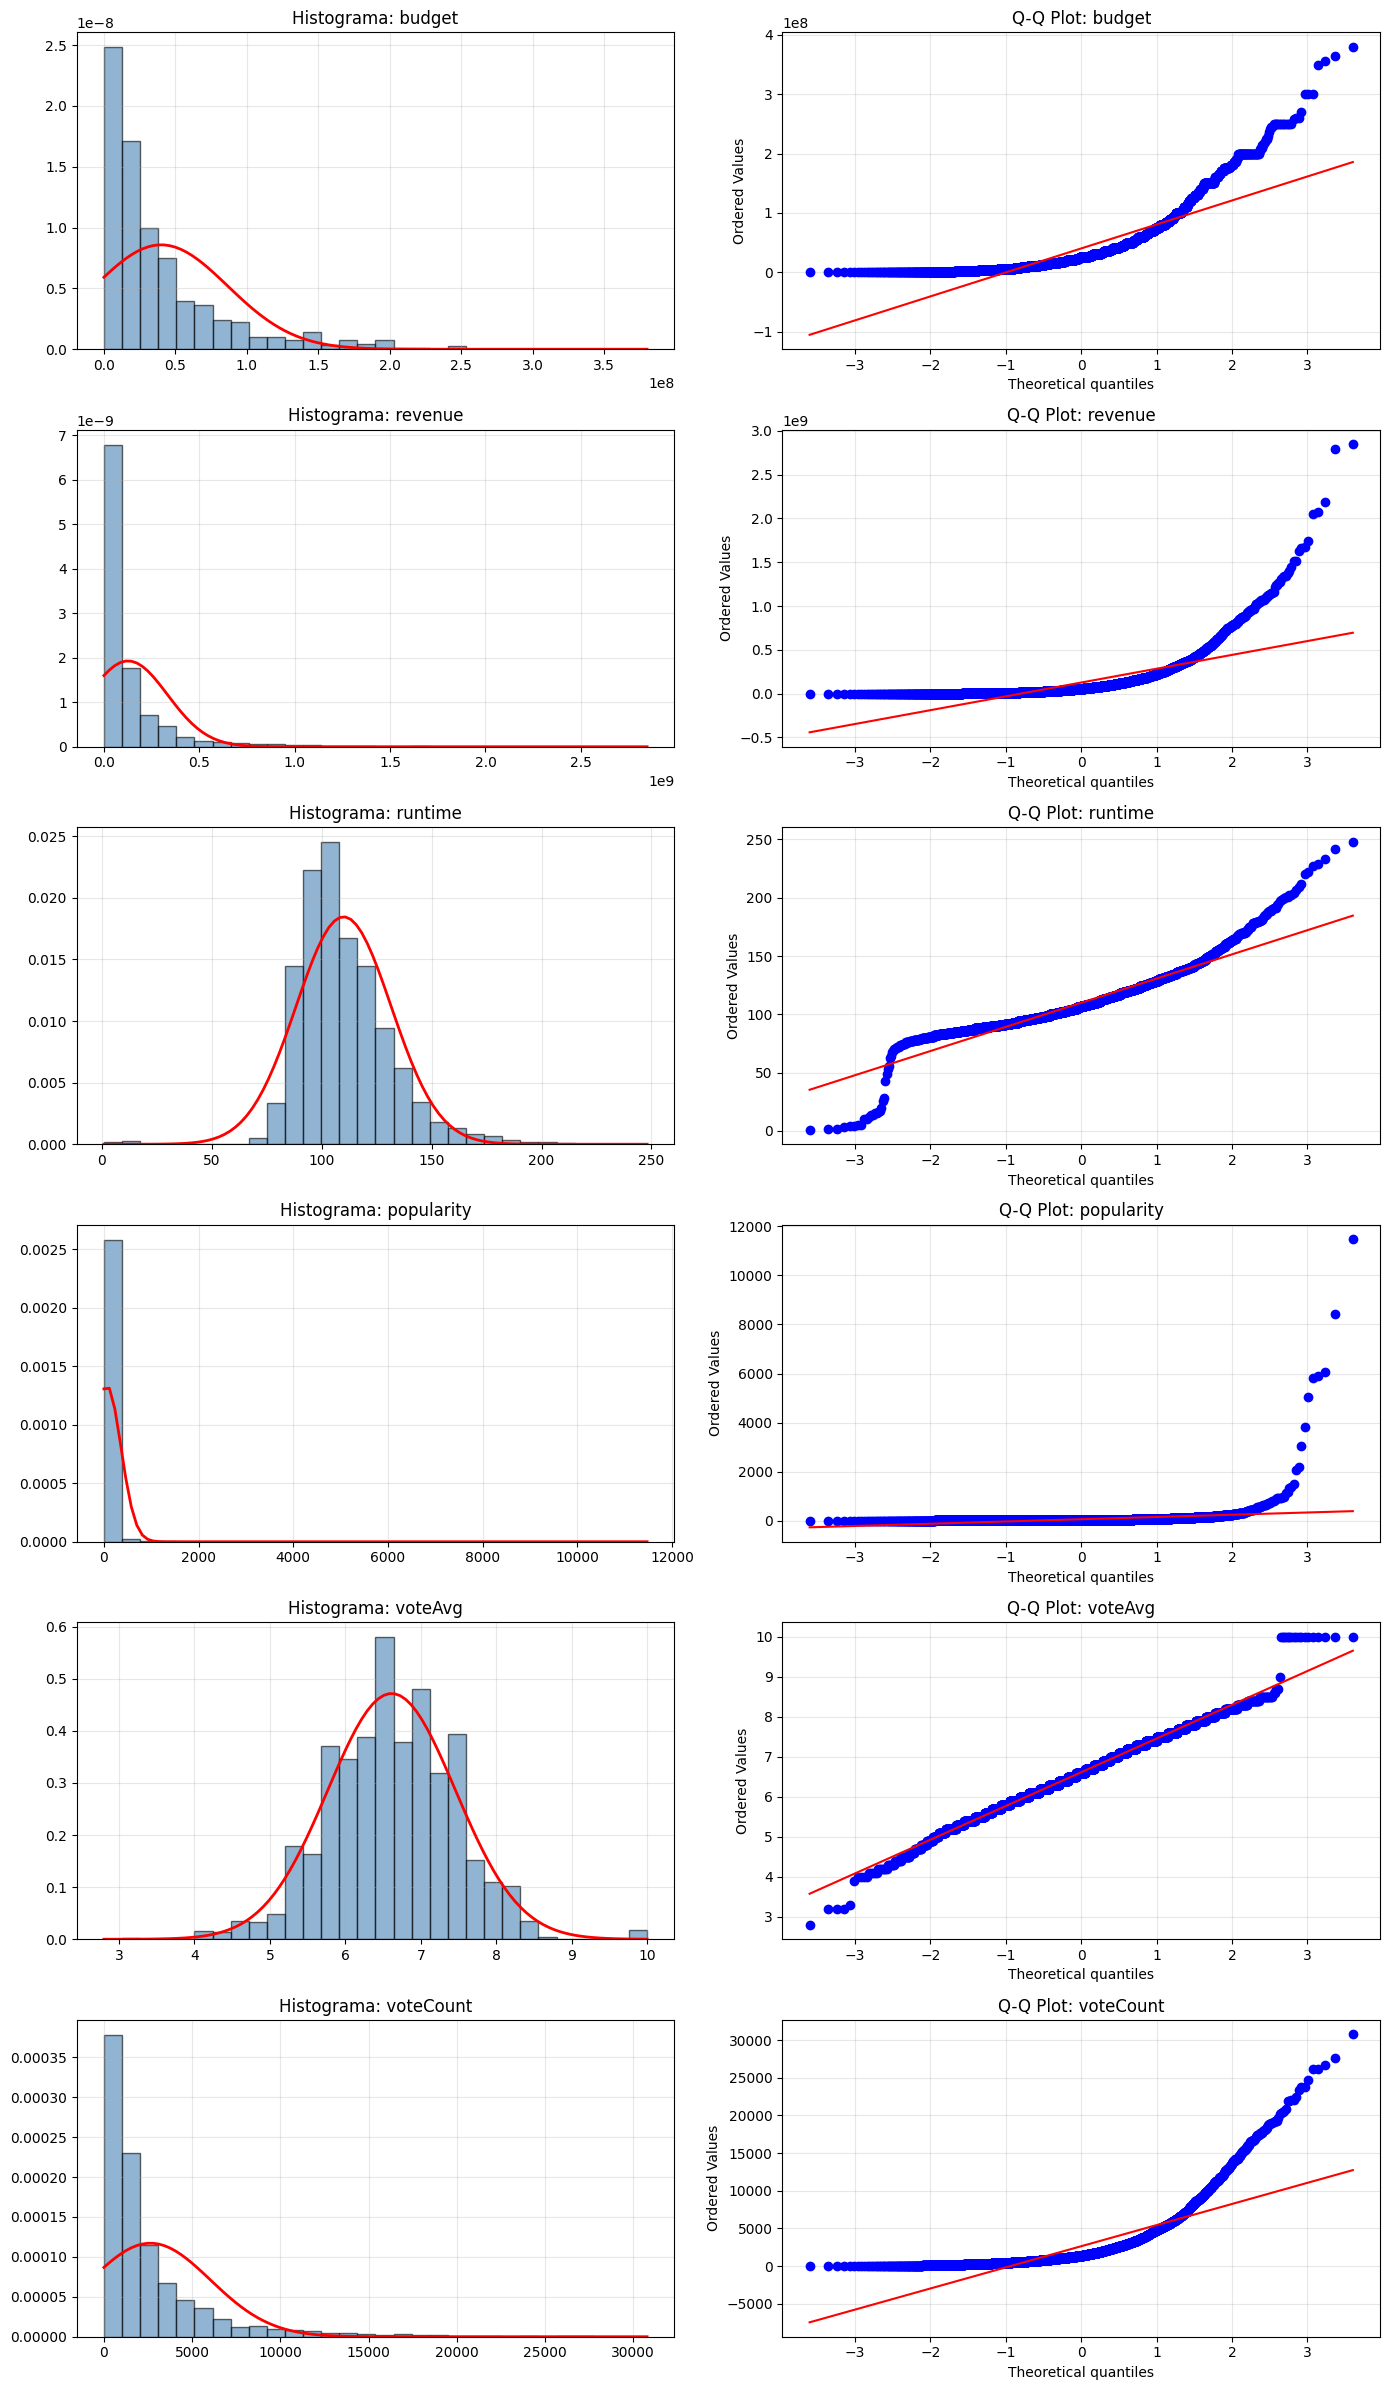

In [78]:
vars_cuant = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount']

# Preparar datos
datos_cuant = datos[vars_cuant].copy()
for col in vars_cuant:
    datos_cuant[col] = datos_cuant[col].replace(0, np.nan)
datos_cuant = datos_cuant.dropna()

print("=" * 80)
print("ANÁLISIS DE NORMALIDAD - GRÁFICOS")
print("=" * 80)

fig, axes = plt.subplots(6, 2, figsize=(14, 24))

for i, col in enumerate(vars_cuant):
    data = datos_cuant[col]
    
    # Histograma
    ax1 = axes[i, 0]
    ax1.hist(data, bins=30, density=True, alpha=0.6, color='steelblue', edgecolor='black')
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    ax1.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2)
    ax1.set_title(f'Histograma: {col}')
    ax1.grid(alpha=0.3)
    
    # Q-Q Plot
    ax2 = axes[i, 1]
    probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {col}')
    ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
# Pruebas de normalidad
print("\n" + "=" * 80)
print("PRUEBAS ESTADÍSTICAS DE NORMALIDAD (Shapiro-Wilk)")
print("=" * 80)
print("Criterio: p-valor > 0.05 = Normal | p-valor ≤ 0.05 = No Normal\n")

resultados = []
for col in vars_cuant:
    data = datos_cuant[col]
    stat_shapiro, p_shapiro = shapiro(data)
    normal = "Sí" if p_shapiro > 0.05 else "No"
    resultados.append({
        'Variable': col,
        'p-valor': f"{p_shapiro:.4e}",
        'Normal': normal
    })

df_norm = pd.DataFrame(resultados)
print(df_norm.to_string(index=False))


PRUEBAS ESTADÍSTICAS DE NORMALIDAD (Shapiro-Wilk)
Criterio: p-valor > 0.05 = Normal | p-valor ≤ 0.05 = No Normal

  Variable    p-valor Normal
    budget 8.5538e-63     No
   revenue 2.3048e-73     No
   runtime 1.1395e-43     No
popularity 3.6607e-90     No
   voteAvg 1.1690e-15     No
 voteCount 4.1578e-68     No


### 3.2 Tablas de Frecuencias de Variables Cualitativas

TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS

🔹 VARIABLES CUALITATIVAS SIMPLES

productionCountry:
productionCountry
United States of America                   4968
US                                          850
Japan                                       613
FR                                          428
GB                                          357
United Kingdom|United States of America     339
BR                                          327
IN                                          315
DE                                          307
United Kingdom                              294

video:
video
False    19313
True        84

director:
director
Steven Spielberg     29
Clint Eastwood       28
Ridley Scott         23
Steven Soderbergh    19
Martin Scorsese      19
Kunihiko Yuyama      19
Robert Zemeckis      18
Ron Howard           18
Woody Allen          17
Sam Liu              16

title:
title
Cinderella      5
Pinocchio       4
The Party       3
Shutter         3
Trust      

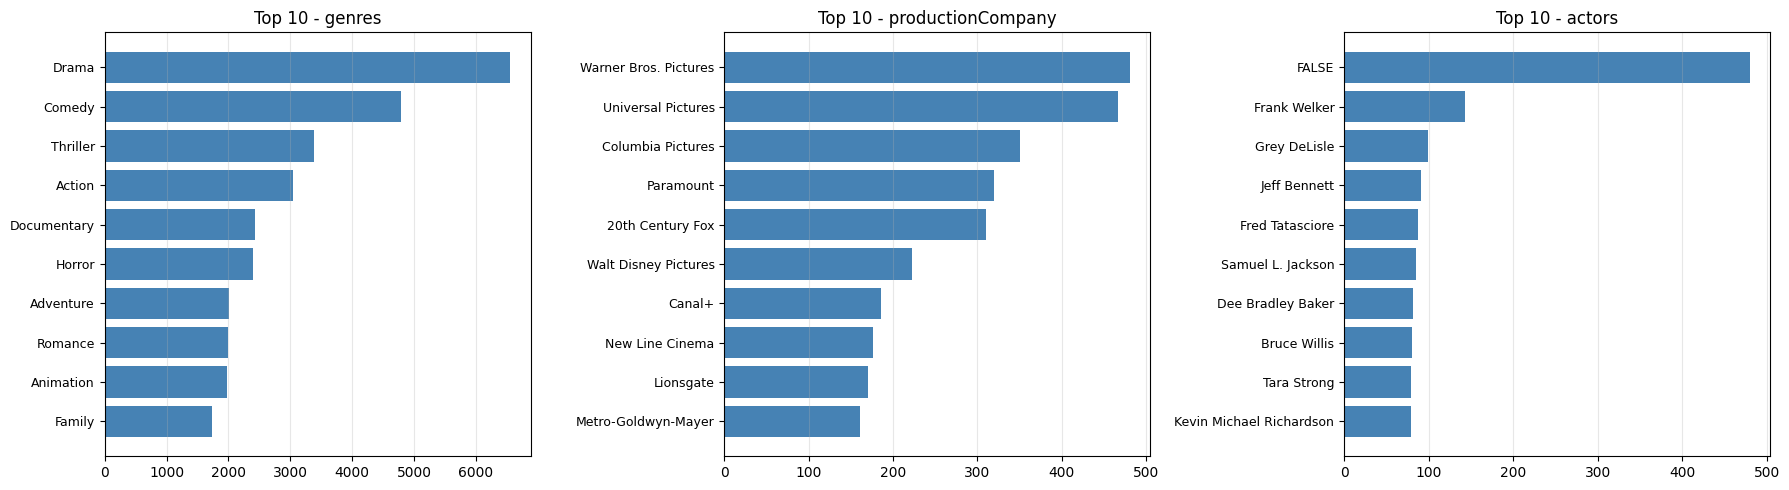

In [80]:
print("=" * 80)
print("TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS")
print("=" * 80)

# ====================================================================================
# A) VARIABLES CUALITATIVAS SIMPLES
# ====================================================================================
print("\n🔹 VARIABLES CUALITATIVAS SIMPLES")
print("=" * 80)

vars_simples = ['productionCountry', 'video', 'director', 'title', 'originalTitle', 'originalLanguage', 'releaseDate']

for var in vars_simples:
    if var in datos.columns:
        freq = datos[var].value_counts().head(10)
        print(f"\n{var}:")
        print(freq.to_string())

# ====================================================================================
# B) VARIABLES CUALITATIVAS MULTIVALUADAS
# ====================================================================================
print("\n\n" + "=" * 80)
print("🔹 VARIABLES CUALITATIVAS MULTIVALUADAS")
print("=" * 80)

vars_multivaluadas = ['genres', 'productionCompany', 'productionCompanyCountry', 'actors', 'actorsCharacter']

for var in vars_multivaluadas:
    if var in datos.columns:
        valores = datos[var].astype(str).str.split('|').explode()
        valores_limpios = valores[valores.str.strip().str.len() > 0]
        valores_limpios = valores_limpios[valores_limpios != 'nan']
        
        if len(valores_limpios) > 0:
            print(f"\n{var}:")
            freq = valores_limpios.value_counts().head(15)
            print(freq.to_string())

# ====================================================================================
# C) GRÁFICOS DE FRECUENCIAS (TOP VARIABLES)
# ====================================================================================
print("\n\n" + "=" * 80)
print("🔹 GRÁFICOS DE FRECUENCIAS - TOP VARIABLES")
print("=" * 80)

vars_grafico = ['genres', 'productionCompany', 'actors']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(vars_grafico):
    if var in datos.columns:
        valores = datos[var].astype(str).str.split('|').explode()
        valores_limpios = valores[valores.str.strip().str.len() > 0]
        valores_limpios = valores_limpios[valores_limpios != 'nan']
        freq = valores_limpios.value_counts().head(10)
        
        axes[i].barh(range(len(freq)), freq.values, color='steelblue')
        axes[i].set_yticks(range(len(freq)))
        axes[i].set_yticklabels(freq.index, fontsize=9)
        axes[i].invert_yaxis()
        axes[i].set_title(f'Top 10 - {var}')
        axes[i].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## EJERCICIO 4: Responder las preguntas (86 puntos)

### 1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [81]:
# 1. ¿Cuáles son las 10 películas que contaron con más presupuesto?
top_10_presupuesto = datos[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
print("=" * 80)
print("TOP 10 PELÍCULAS CON MÁS PRESUPUESTO")
print("=" * 80)
print(top_10_presupuesto.to_string(index=False))

TOP 10 PELÍCULAS CON MÁS PRESUPUESTO
                                      title      budget
Pirates of the Caribbean: On Stranger Tides 380000000.0
                    Avengers: Age of Ultron 365000000.0
                          Avengers: Endgame 356000000.0
                       Avatar: Fire and Ash 350000000.0
   Pirates of the Caribbean: At World's End 300000000.0
                     Avengers: Infinity War 300000000.0
                             Justice League 300000000.0
                           Superman Returns 270000000.0
                                    Tangled 260000000.0
                              The Lion King 260000000.0


### 2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [82]:
# 2. ¿Cuáles son las 10 películas que más ingresos tuvieron?
top_10_ingresos = datos[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
print("=" * 80)
print("TOP 10 PELÍCULAS CON MÁS INGRESOS")
print("=" * 80)
print(top_10_ingresos.to_string(index=False))

TOP 10 PELÍCULAS CON MÁS INGRESOS
                       title      revenue
                      Avatar 2847246203.0
           Avengers: Endgame 2797800564.0
                     Titanic 2187463944.0
Star Wars: The Force Awakens 2068223624.0
      Avengers: Infinity War 2046239637.0
                  Zootopia 2 1744338246.0
              Jurassic World 1671713208.0
               The Lion King 1667635327.0
     Spider-Man: No Way Home 1631853496.0
                The Avengers 1518815515.0


### 3. ¿Cuál es la película que más votos tuvo?

In [83]:
# 3. ¿Cuál es la película que más votos tuvo?
pelicula_mas_votos = datos[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)
print("=" * 80)
print("PELÍCULA CON MÁS VOTOS")
print("=" * 80)
print(pelicula_mas_votos.to_string(index=False))

PELÍCULA CON MÁS VOTOS
    title  voteCount
Inception      30788


### 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [84]:
# 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
peor_pelicula_votos = datos[['title', 'voteAvg']].sort_values(by='voteAvg', ascending=True).head(1)
print("=" * 80)
print("PEOR PELÍCULA SEGÚN VOTOS DE USUARIOS")
print("=" * 80)
print(peor_pelicula_votos.to_string(index=False))

PEOR PELÍCULA SEGÚN VOTOS DE USUARIOS
          title  voteAvg
Avant de Sortir      0.0


### 5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras


Año con más películas: 2025.0 (7,351 películas)
CANTIDAD DE PELÍCULAS POR AÑO


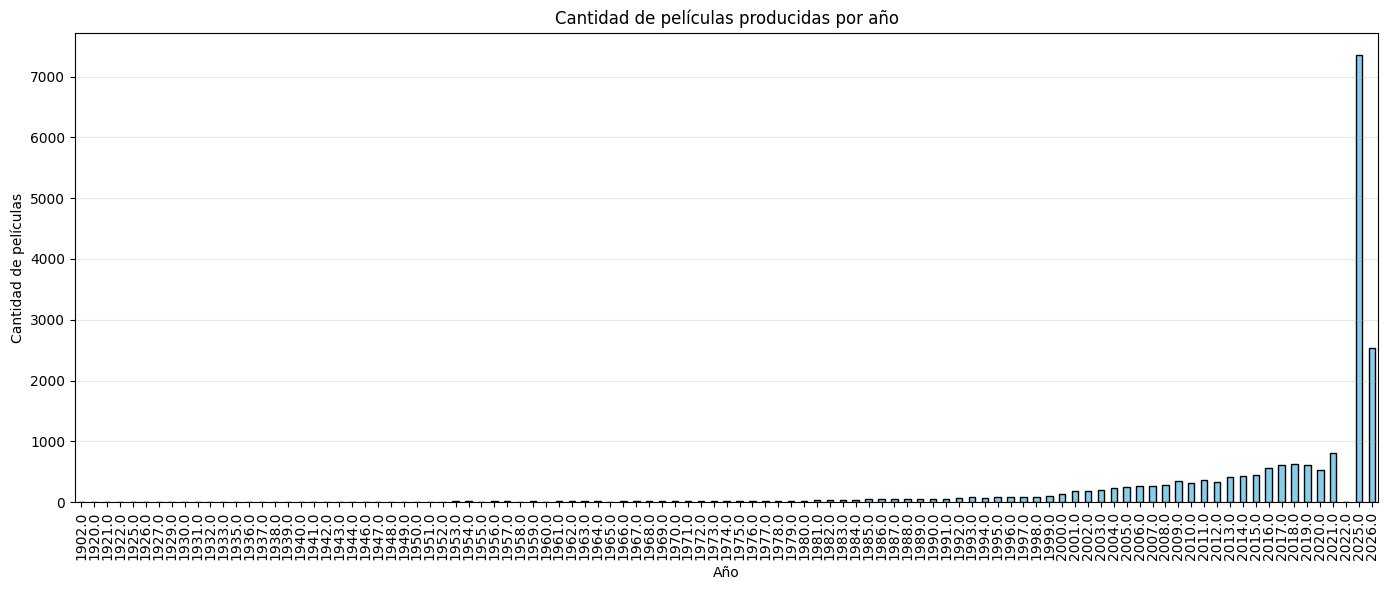

In [85]:
# 5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?
peliculas_por_año = datos['releaseYear'].value_counts().sort_index()
año_mas_peliculas = peliculas_por_año.idxmax()
print(f"\nAño con más películas: {año_mas_peliculas} ({peliculas_por_año[año_mas_peliculas]:,} películas)")
print("=" * 80)
print("CANTIDAD DE PELÍCULAS POR AÑO")
print("=" * 80)
#grafica de barras
plt.figure(figsize=(14, 6))
peliculas_por_año.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de películas producidas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 6. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?

GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES
                                          title genero_principal  releaseYear
                                       Immersed            Drama       2026.0
                                     Cinderella        Animation       2026.0
                                        Aladdin        Animation       2026.0
                          THE RING AND THE DECK         Thriller       2026.0
                                 Crimson High 3        Animation       2026.0
Conversations with Rasparagus Asparagus Baragus           Comedy       2026.0
                                Highway To Hell           Comedy       2026.0
                                Pari's daughter            Drama       2026.0
                                         Escort           Action       2026.0
                                          Dream            Drama       2026.0
                                         Lively            Drama       2026.0
          ÙØ§ÛÙâØ³

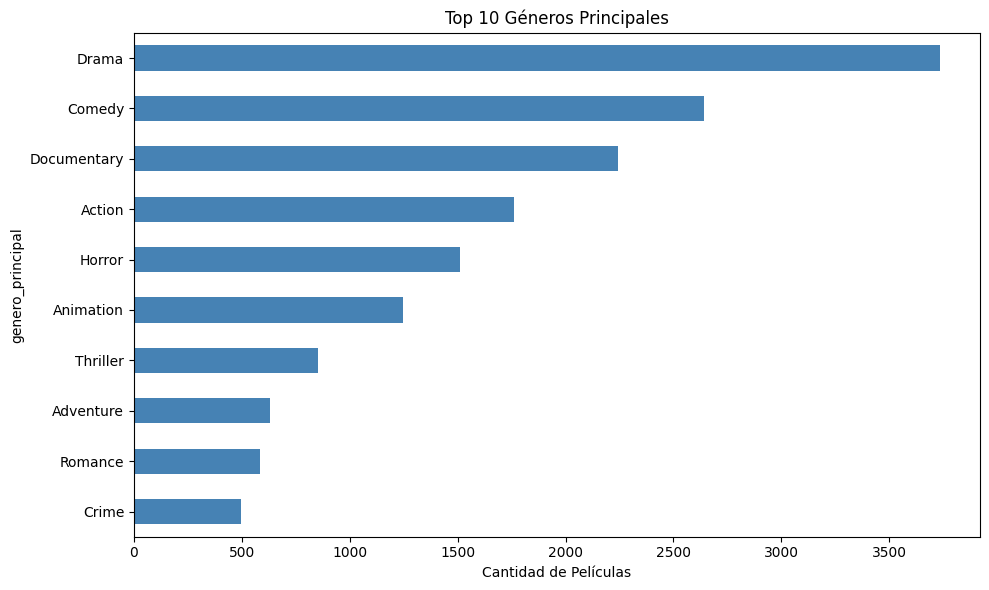


GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS
                                                         title  runtime genero_principal
         How Ponyo was Born ~Hayao Miyazaki's Thought Process~      750      Documentary
                                                Before the End      675           Action
                 League of Legends Worlds25 - Finals in Cinema      420              NaN
Crystal Lake Memories: The Complete History of Friday the 13th      400      Documentary
                              In Search of Darkness: 1995-1999      384      Documentary
                               Vu 2025 (lâannÃ©e du zapping)      366              NaN
                                                      Napoleon      333            Drama
                          White Gardenia: The King James Bible      330           Horror
                                       NJPW Wrestle Kingdom 20      326              NaN
                                                          1900      317

In [86]:
# 6. Género principal de películas recientes, predominante y películas más largas
datos['genero_principal'] = datos['genres'].str.split('|').str[0]

# Género de las 20 más recientes
recientes_20 = datos.nlargest(20, 'releaseYear')[['title', 'genero_principal', 'releaseYear']]
print("=" * 80)
print("GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES")
print("=" * 80)
print(recientes_20.to_string(index=False))
print(f"\nDistribución de géneros:")
print(recientes_20['genero_principal'].value_counts().to_string())

# Género predominante en el dataset
generos_todos = datos['genero_principal'].value_counts()
print("\n" + "=" * 80)
print("GÉNERO PREDOMINANTE EN EL DATASET")
print("=" * 80)
print(f"El género principal predominante es: {generos_todos.index[0]}")
print(f"Con {generos_todos.values[0]:,} películas ({generos_todos.values[0]/len(datos)*100:.2f}%)")

# Gráfico de top 10 géneros
plt.figure(figsize=(10, 6))
generos_todos.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Cantidad de Películas')
plt.title('Top 10 Géneros Principales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Género de las películas más largas
peliculas_largas = datos[datos['runtime'] > 0].nlargest(20, 'runtime')[['title', 'runtime', 'genero_principal']]
print("\n" + "=" * 80)
print("GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS")
print("=" * 80)
print(peliculas_largas.to_string(index=False))
print(f"\nDistribución de géneros:")
print(peliculas_largas['genero_principal'].value_counts().to_string())

### 7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [87]:
# ============================================================================
# EJERCICIO 7: GANANCIAS POR GÉNERO PRINCIPAL
# ============================================================================

print("=" * 80)
print("EJERCICIO 7: ¿PELÍCULAS DE QUÉ GÉNERO PRINCIPAL OBTUVIERON MAYORES GANANCIAS?")
print("=" * 80)

# Calcular ganancias (revenue - budget)
datos['ganancias'] = datos['revenue'] - datos['budget']

# Filtrar películas con datos válidos (revenue > 0 y budget > 0)
datos_con_ganancias = datos[(datos['revenue'] > 0) & (datos['budget'] > 0)].copy()

print(f"\nPelículas analizadas: {len(datos_con_ganancias):,}")

# Agrupar por género principal y calcular ganancias totales
ganancias_por_genero = datos_con_ganancias.groupby('genero_principal').agg({
    'ganancias': ['sum', 'mean', 'count']
}).round(0)

ganancias_por_genero.columns = ['Ganancia_Total', 'Ganancia_Promedio', 'Cantidad_Películas']
ganancias_por_genero = ganancias_por_genero.sort_values('Ganancia_Total', ascending=False)

print("\nGanancias por género principal (ordenado por ganancias totales):\n")
print(ganancias_por_genero.to_string())

print("\n" + "=" * 80)
print("RESPUESTA")
print("=" * 80)
genero_ganador = ganancias_por_genero.index[0]
ganancia_total = ganancias_por_genero.iloc[0]['Ganancia_Total']
cantidad = ganancias_por_genero.iloc[0]['Cantidad_Películas']

print(f"\n✓ El género principal que obtuvo mayores ganancias fue: {genero_ganador}")
print(f"  - Ganancia total: ${ganancia_total:,.0f}")
print(f"  - Número de películas: {int(cantidad)}")
print("=" * 80)

EJERCICIO 7: ¿PELÍCULAS DE QUÉ GÉNERO PRINCIPAL OBTUVIERON MAYORES GANANCIAS?

Películas analizadas: 4,502

Ganancias por género principal (ordenado por ganancias totales):

                  Ganancia_Total  Ganancia_Promedio  Cantidad_Películas
genero_principal                                                       
Action              9.219561e+10        118351236.0                 779
Adventure           6.035407e+10        171948918.0                 351
Comedy              4.922083e+10         61143894.0                 805
Drama               4.258850e+10         49521513.0                 860
Animation           3.200568e+10        176826973.0                 181
Horror              1.802644e+10         48328258.0                 373
Family              1.797826e+10        136198976.0                 132
Science Fiction     1.775765e+10        122466526.0                 145
Fantasy             1.514620e+10        110556183.0                 137
Thriller            1.015124e+10  

### 8. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

CANTIDAD DE ACTORES VS INGRESOS
Películas analizadas: 4,294

Correlación Spearman: 0.3686


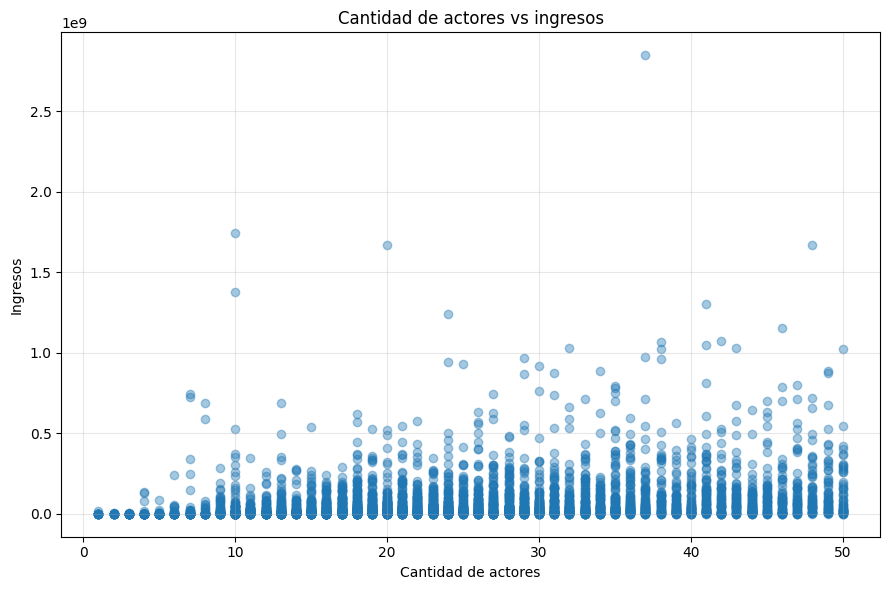


EVOLUCIÓN DE ACTORES POR AÑO


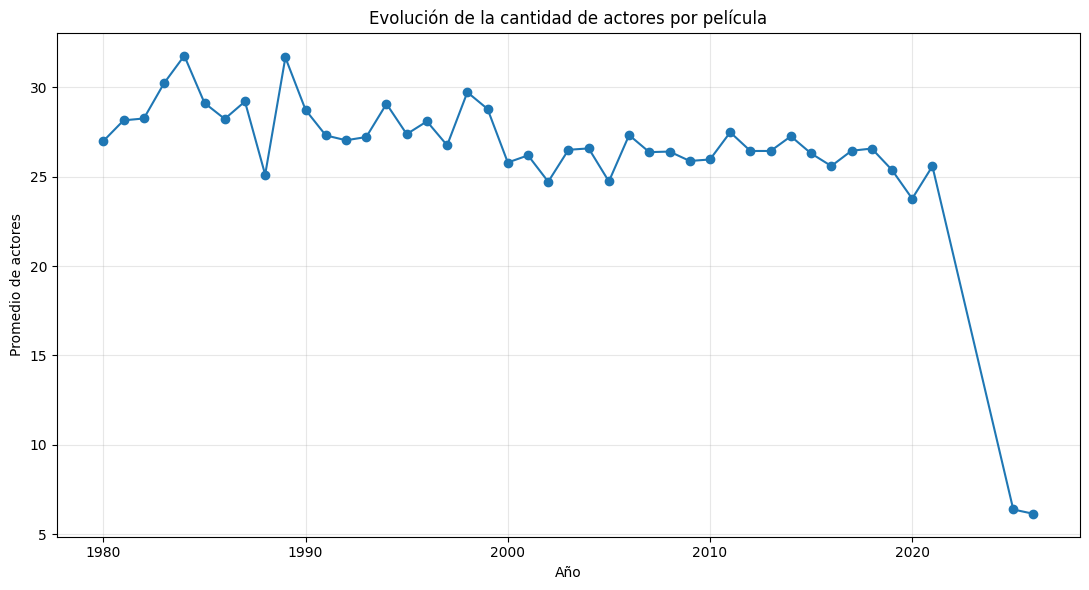


Promedio actores primeros 10 años: 28.88
Promedio actores últimos 10 años:  21.95
Diferencia: -6.93


In [88]:
# 8. ¿La cantidad de actores influye en los ingresos? ¿Más actores en los últimos años?
df = datos[(datos['actorsAmount'] > 0) & (datos['actorsAmount'] <= 50) & (datos['revenue'] > 0)].copy()

print("=" * 80)
print("CANTIDAD DE ACTORES VS INGRESOS")
print("=" * 80)
print(f"Películas analizadas: {len(df):,}")

# Correlación actores-ingresos
corr_spearman, _ = spearmanr(df['actorsAmount'], df['revenue'])
print(f"\nCorrelación Spearman: {corr_spearman:.4f}")

# Gráfico de dispersión
plt.figure(figsize=(9,6))
plt.scatter(df['actorsAmount'], df['revenue'], alpha=0.4)
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.title('Cantidad de actores vs ingresos')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Evolución de actores por año
df_tiempo = df[df['releaseYear'] >= 1980]
actores_por_año = df_tiempo.groupby('releaseYear')['actorsAmount'].mean()

print("\n" + "=" * 80)
print("EVOLUCIÓN DE ACTORES POR AÑO")
print("=" * 80)

plt.figure(figsize=(11,6))
plt.plot(actores_por_año.index, actores_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Promedio de actores')
plt.title('Evolución de la cantidad de actores por película')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

primeros = actores_por_año.head(10).mean()
ultimos = actores_por_año.tail(10).mean()
print(f"\nPromedio actores primeros 10 años: {primeros:.2f}")
print(f"Promedio actores últimos 10 años:  {ultimos:.2f}")
print(f"Diferencia: {ultimos - primeros:.2f}")

### 9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

GÉNERO DEL REPARTO VS POPULARIDAD E INGRESOS
Películas analizadas: 4,860

Correlación mujeres-ingresos: -0.0632
Correlación mujeres-popularidad: 0.0263

Correlación hombres-ingresos: 0.0632
Correlación hombres-popularidad: -0.0263


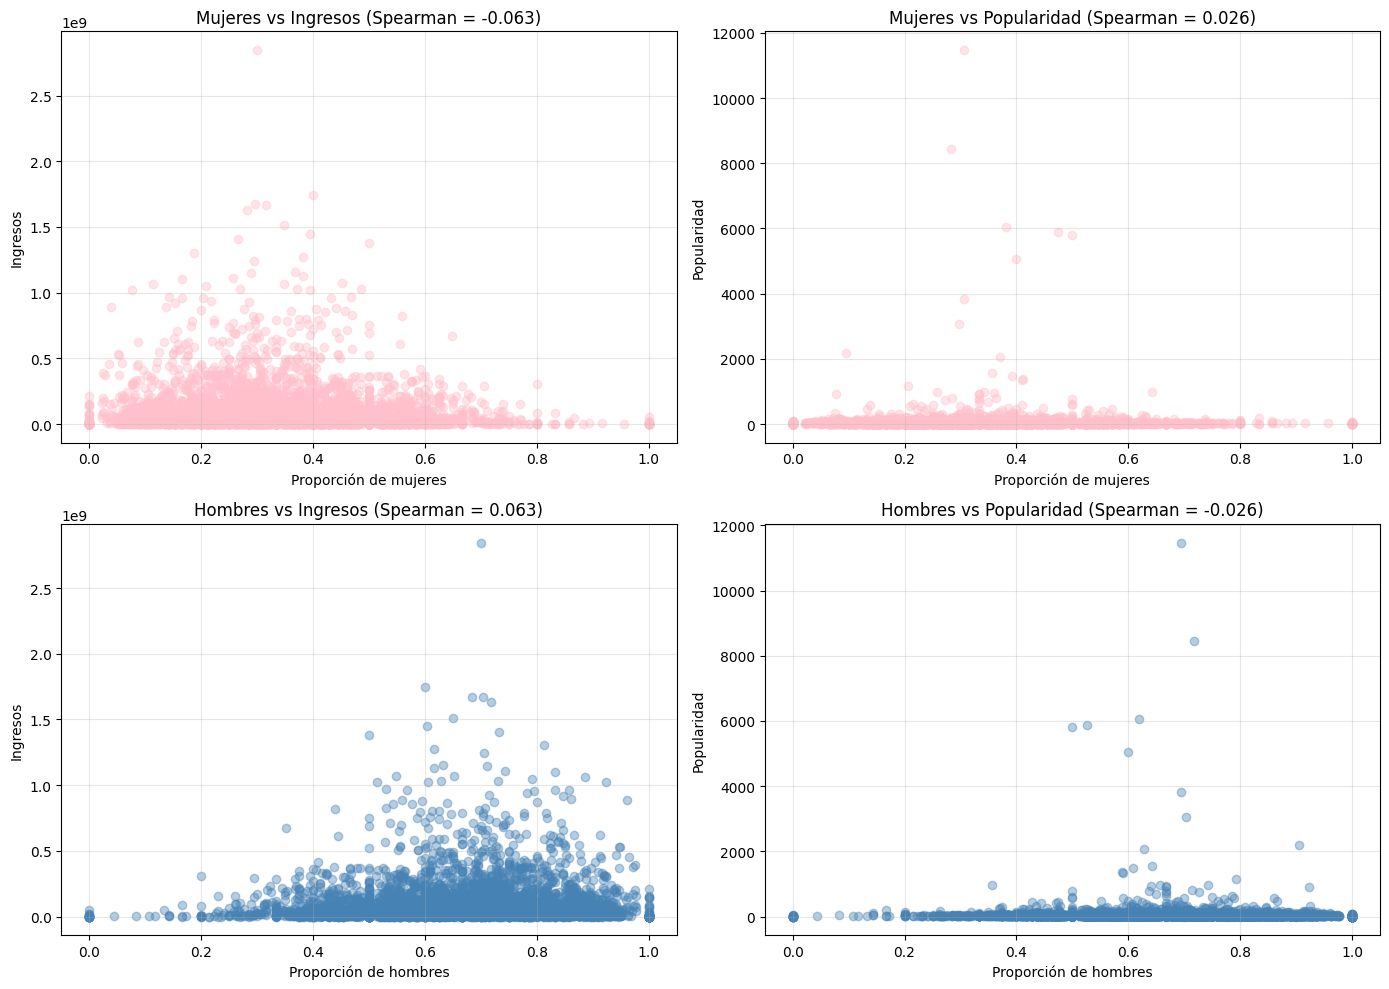

In [89]:
# 9. ¿Influye el género del reparto en la popularidad e ingresos?
df9 = datos[
    (datos['castWomenAmount'] >= 0) &
    (datos['castMenAmount'] >= 0) &
    (datos['revenue'] > 0) &
    (datos['popularity'] > 0)
].copy()

df9['total_actores'] = df9['castWomenAmount'] + df9['castMenAmount']
df9 = df9[(df9['total_actores'] > 0) & (df9['total_actores'] <= 50)]
df9['proporcion_mujeres'] = df9['castWomenAmount'] / df9['total_actores']
df9['proporcion_hombres'] = df9['castMenAmount'] / df9['total_actores']

print("=" * 80)
print("GÉNERO DEL REPARTO VS POPULARIDAD E INGRESOS")
print("=" * 80)
print(f"Películas analizadas: {len(df9):,}")

# Correlaciones para mujeres
corr_mujeres_ingresos, _ = spearmanr(df9['proporcion_mujeres'], df9['revenue'])
corr_mujeres_popularidad, _ = spearmanr(df9['proporcion_mujeres'], df9['popularity'])
print(f"\nCorrelación mujeres-ingresos: {corr_mujeres_ingresos:.4f}")
print(f"Correlación mujeres-popularidad: {corr_mujeres_popularidad:.4f}")

# Correlaciones para hombres
corr_hombres_ingresos, _ = spearmanr(df9['proporcion_hombres'], df9['revenue'])
corr_hombres_popularidad, _ = spearmanr(df9['proporcion_hombres'], df9['popularity'])
print(f"\nCorrelación hombres-ingresos: {corr_hombres_ingresos:.4f}")
print(f"Correlación hombres-popularidad: {corr_hombres_popularidad:.4f}")

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fila 1: Mujeres
axes[0, 0].scatter(df9['proporcion_mujeres'], df9['revenue'], alpha=0.4, color='pink')
axes[0, 0].set_xlabel('Proporción de mujeres')
axes[0, 0].set_ylabel('Ingresos')
axes[0, 0].set_title(f'Mujeres vs Ingresos (Spearman = {corr_mujeres_ingresos:.3f})')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(df9['proporcion_mujeres'], df9['popularity'], alpha=0.4, color='pink')
axes[0, 1].set_xlabel('Proporción de mujeres')
axes[0, 1].set_ylabel('Popularidad')
axes[0, 1].set_title(f'Mujeres vs Popularidad (Spearman = {corr_mujeres_popularidad:.3f})')
axes[0, 1].grid(alpha=0.3)

# Fila 2: Hombres
axes[1, 0].scatter(df9['proporcion_hombres'], df9['revenue'], alpha=0.4, color='steelblue')
axes[1, 0].set_xlabel('Proporción de hombres')
axes[1, 0].set_ylabel('Ingresos')
axes[1, 0].set_title(f'Hombres vs Ingresos (Spearman = {corr_hombres_ingresos:.3f})')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(df9['proporcion_hombres'], df9['popularity'], alpha=0.4, color='steelblue')
axes[1, 1].set_xlabel('Proporción de hombres')
axes[1, 1].set_ylabel('Popularidad')
axes[1, 1].set_title(f'Hombres vs Popularidad (Spearman = {corr_hombres_popularidad:.3f})')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [90]:
# 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?
top_20_calificadas = datos.nlargest(20, 'voteAvg')[['title', 'director', 'voteAvg']]
print("=" * 80)
print("DIRECTORES DE LAS 20 PELÍCULAS MEJOR CALIFICADAS")
print("=" * 80)
print(top_20_calificadas.to_string(index=False))

print("\n" + "=" * 80)
print("DIRECTORES MÁS FRECUENTES EN EL TOP 20")
print("=" * 80)
directores_frecuentes = top_20_calificadas['director'].value_counts()
print(directores_frecuentes.to_string())

DIRECTORES DE LAS 20 PELÍCULAS MEJOR CALIFICADAS
                                title                                       director  voteAvg
                       Crocodile Dose                                   Jason Waters     10.0
                         The Exchange                               Fischer Sawatzky     10.0
                       What is This ?                                     Kanan Gill     10.0
                     Silver Gold Wood                                Vitorio Stankov     10.0
                    AdiÃ³s Para Nunca                               Daniela Vidovich     10.0
                          GO TO SLEEP                                 Tirion Liddell     10.0
                Le Moment sera le Bon                         Guillaume Huss Seewald     10.0
                              Satiata                                  Cyprien Klein     10.0
                               Orphen                   Joe Arodann|AnaÃ¯s Richerand     10.0
           

### 11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

EJERCICIO 11: PRESUPUESTO vs INGRESOS

Correlación de Pearson: 0.7229
Películas analizadas: 4,502

Ratio ingresos/presupuesto (mediana): 2.37x


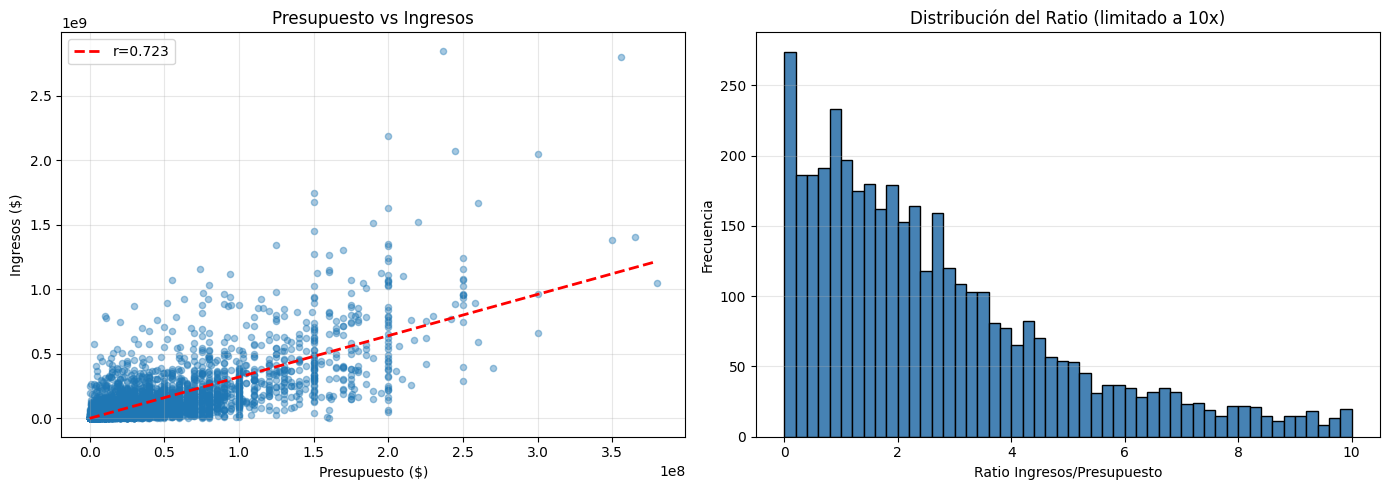

In [91]:
# Ejercicio 11: Correlación Presupuesto vs Ingresos
df = datos[(datos['budget'] > 0) & (datos['revenue'] > 0)].copy()

print("="*60)
print("EJERCICIO 11: PRESUPUESTO vs INGRESOS")
print("="*60)

# Correlación
corr = df['budget'].corr(df['revenue'])
print(f"\nCorrelación de Pearson: {corr:.4f}")
print(f"Películas analizadas: {len(df):,}")

# Ratio ingresos/presupuesto
df['ratio'] = df['revenue'] / df['budget']
print(f"\nRatio ingresos/presupuesto (mediana): {df['ratio'].median():.2f}x")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dispersión
axes[0].scatter(df['budget'], df['revenue'], alpha=0.4, s=20)
z = np.polyfit(df['budget'], df['revenue'], 1)
p = np.poly1d(z)
x_line = np.array([df['budget'].min(), df['budget'].max()])
axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label=f'r={corr:.3f}')
axes[0].set_xlabel('Presupuesto ($)')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title('Presupuesto vs Ingresos')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma de ratio
axes[1].hist(df['ratio'][df['ratio'] <= 10], bins=50, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Ratio Ingresos/Presupuesto')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución del Ratio (limitado a 10x)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

EJERCICIO 12: MESES DE LANZAMIENTO VS INGRESOS

Películas analizadas: 5,398

Ingresos por mes (mediana):
         median         mean  count
Ene  27233270.0   60407604.0    368
Feb  41146058.0   82768572.0    366
Mar  37713879.0   97108375.0    429
Abr  32339075.0  102252891.0    358
May  45361000.0  165272557.0    371
Jun  66001002.0  165807439.0    468
Jul  54682547.0  132764089.0    465
Ago  34032922.0   70777333.0    464
Sep  20350754.0   60335029.0    571
Oct  29918745.0   85148627.0    489
Nov  43278503.0  127811630.0    470
Dic  51053787.0  124411468.0    579

 El mejor mes para lanzar es: Jun
  Ingresos medianos: $66,001,002


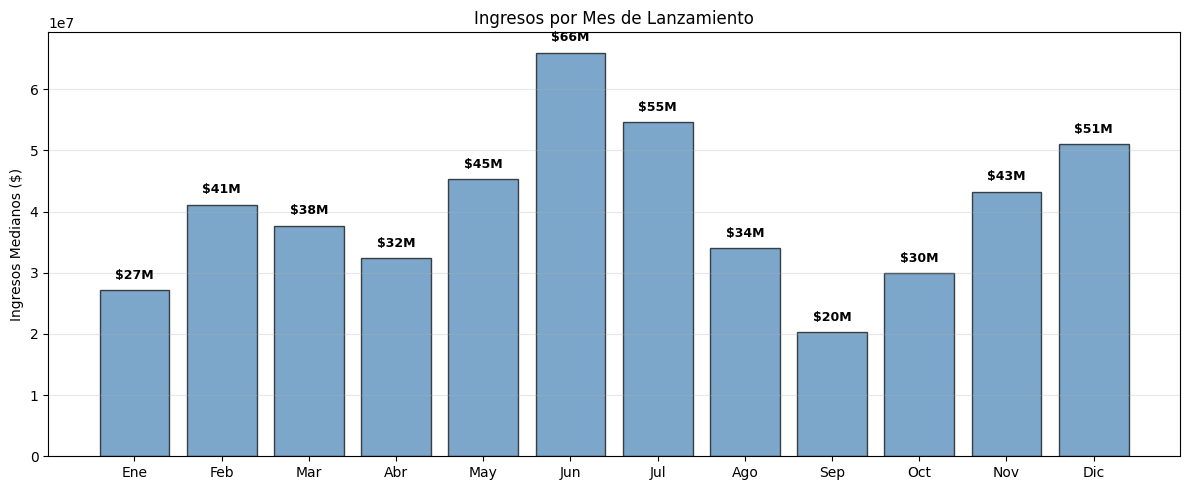

In [92]:
# Ejercicio 12: Meses de lanzamiento vs ingresos
df = datos[(datos['revenue'] > 0) & (datos['releaseDate'].notna())].copy()

# Extraer mes
df['mes'] = pd.to_datetime(df['releaseDate'], errors='coerce').dt.month
df = df[df['mes'].notna()]

print("="*60)
print("EJERCICIO 12: MESES DE LANZAMIENTO VS INGRESOS")
print("="*60)

# Agrupar por mes
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ingresos_por_mes = df.groupby('mes')['revenue'].agg(['median', 'mean', 'count']).round(0)
ingresos_por_mes.index = [meses_nombres[int(i)-1] for i in ingresos_por_mes.index]

print(f"\nPelículas analizadas: {len(df):,}")
print("\nIngresos por mes (mediana):")
print(ingresos_por_mes)

mejor_mes = ingresos_por_mes['median'].idxmax()
print(f"\n El mejor mes para lanzar es: {mejor_mes}")
print(f"  Ingresos medianos: ${ingresos_por_mes.loc[mejor_mes, 'median']:,.0f}")

# Gráfico
fig, ax = plt.subplots(figsize=(12, 5))
x_pos = range(len(ingresos_por_mes))
ax.bar(x_pos, ingresos_por_mes['median'], color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(ingresos_por_mes.index)
ax.set_ylabel('Ingresos Medianos ($)')
ax.set_title('Ingresos por Mes de Lanzamiento')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(ingresos_por_mes['median']):
    ax.text(i, v + (ingresos_por_mes['median'].max() * 0.02), f'${v/1e6:.0f}M', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 13. ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuantas películas, en promedio, se han lanzado por mes?

EJERCICIO 13: INGRESOS POR MES Y PROMEDIO DE LANZAMIENTOS

Películas analizadas: 5,398
Años totales en análisis: 107.0

Resultados por mes:
                median  count  promedio_lanzamientos
mes_nombre                                          
Ene         27233270.0    368                    3.4
Feb         41146058.0    366                    3.4
Mar         37713879.0    429                    4.0
Abr         32339075.0    358                    3.3
May         45361000.0    371                    3.5
Jun         66001002.0    468                    4.4
Jul         54682547.0    465                    4.3
Ago         34032922.0    464                    4.3
Sep         20350754.0    571                    5.3
Oct         29918745.0    489                    4.6
Nov         43278503.0    470                    4.4
Dic         51053787.0    579                    5.4

 Top 3 meses con mejores ingresos:
  1. Jun: $66,001,002 (mediana)
  2. Jul: $54,682,547 (mediana)
  3. Dic: $51,053,

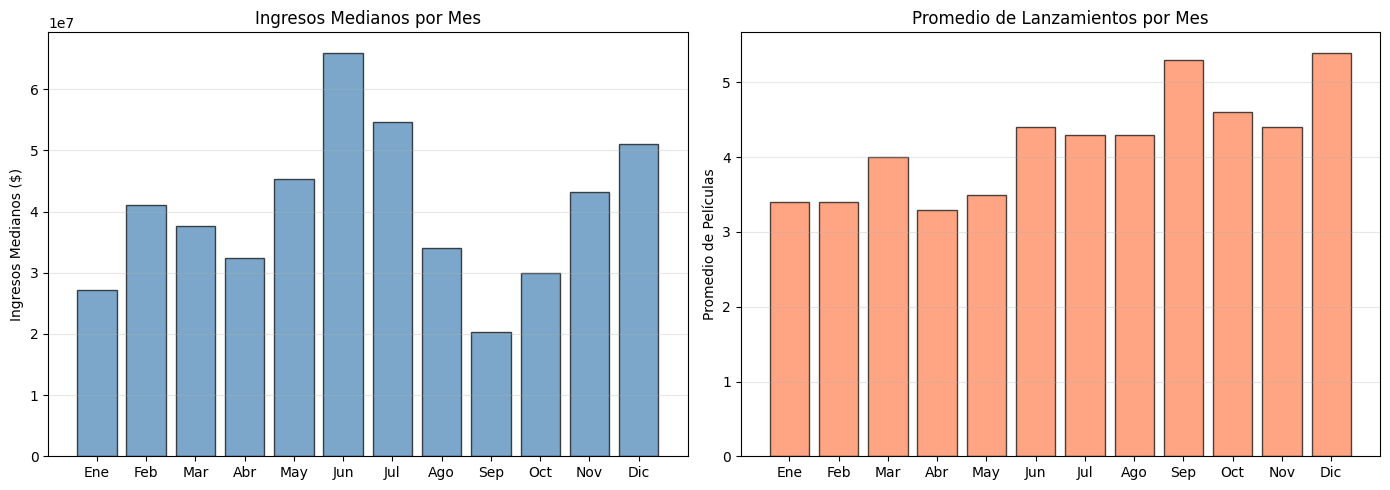

In [93]:
# Ejercicio 13: Meses con mejores ingresos y promedio de lanzamientos
df = datos[(datos['revenue'] > 0) & (datos['releaseDate'].notna())].copy()
df['mes'] = pd.to_datetime(df['releaseDate'], errors='coerce').dt.month
df = df[df['mes'].notna()]

print("="*60)
print("EJERCICIO 13: INGRESOS POR MES Y PROMEDIO DE LANZAMIENTOS")
print("="*60)

# Meses nombres
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Agrupar por mes
analisis_mes = df.groupby('mes')['revenue'].agg(['median', 'count']).round(0)
analisis_mes['mes_nombre'] = [meses_nombres[int(i)-1] for i in analisis_mes.index]
analisis_mes = analisis_mes.set_index('mes_nombre')

print(f"\nPelículas analizadas: {len(df):,}")
print(f"Años totales en análisis: {df['releaseYear'].max() - df['releaseYear'].min() + 1}")
años_totales = df['releaseYear'].max() - df['releaseYear'].min() + 1

# Calcular promedio por mes
analisis_mes['promedio_lanzamientos'] = (analisis_mes['count'] / años_totales).round(1)

print("\nResultados por mes:")
print(analisis_mes[['median', 'count', 'promedio_lanzamientos']].to_string())

# Top 3 mejores meses
top_meses = analisis_mes.nlargest(3, 'median')
print(f"\n Top 3 meses con mejores ingresos:")
for i, (mes, row) in enumerate(top_meses.iterrows(), 1):
    print(f"  {i}. {mes}: ${row['median']:,.0f} (mediana)")

print(f"\n Promedio de películas lanzadas por mes: {analisis_mes['promedio_lanzamientos'].mean():.1f} películas")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ingresos por mes
axes[0].bar(range(len(analisis_mes)), analisis_mes['median'], color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(analisis_mes)))
axes[0].set_xticklabels(analisis_mes.index)
axes[0].set_ylabel('Ingresos Medianos ($)')
axes[0].set_title('Ingresos Medianos por Mes')
axes[0].grid(axis='y', alpha=0.3)

# Cantidad de lanzamientos por mes
axes[1].bar(range(len(analisis_mes)), analisis_mes['promedio_lanzamientos'], color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(analisis_mes)))
axes[1].set_xticklabels(analisis_mes.index)
axes[1].set_ylabel('Promedio de Películas')
axes[1].set_title('Promedio de Lanzamientos por Mes')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

EJERCICIO 14: CALIFICACIONES vs ÉXITO COMERCIAL

Películas analizadas: 5,296

Correlación voteAvg (calificación) vs revenue: 0.1530
Correlación voteCount (cantidad votos) vs revenue: 0.7282
Correlación popularity vs revenue: 0.1772


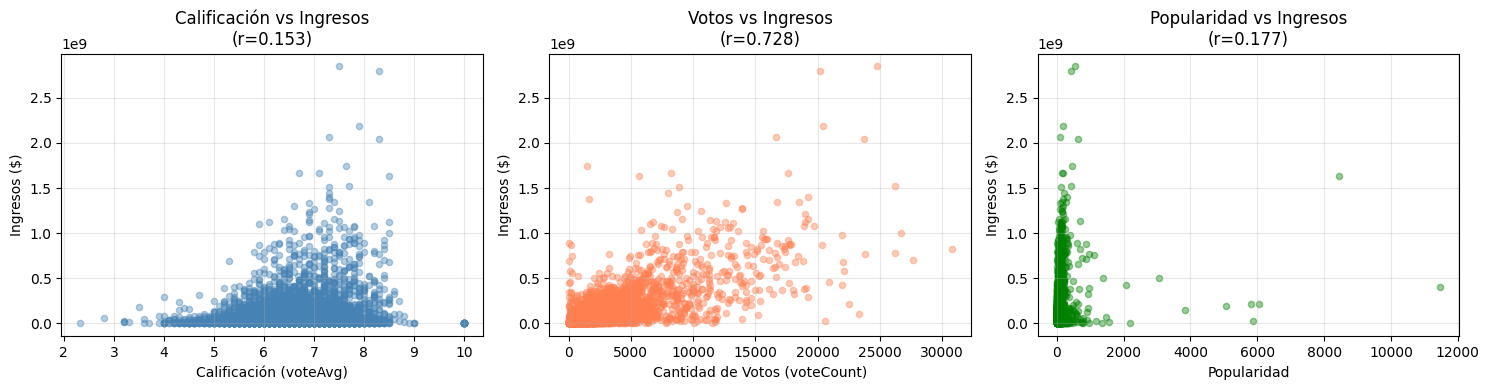

In [94]:
# Ejercicio 14: Correlación entre calificaciones y éxito comercial
df = datos[(datos['revenue'] > 0) & (datos['voteAvg'] > 0) & (datos['voteCount'] > 0)].copy()

print("="*60)
print("EJERCICIO 14: CALIFICACIONES vs ÉXITO COMERCIAL")
print("="*60)

# Correlaciones
corr_voteavg_revenue = df['voteAvg'].corr(df['revenue'])
corr_votecount_revenue = df['voteCount'].corr(df['revenue'])
corr_popularity_revenue = df['popularity'].corr(df['revenue'])

print(f"\nPelículas analizadas: {len(df):,}")
print(f"\nCorrelación voteAvg (calificación) vs revenue: {corr_voteavg_revenue:.4f}")
print(f"Correlación voteCount (cantidad votos) vs revenue: {corr_votecount_revenue:.4f}")
print(f"Correlación popularity vs revenue: {corr_popularity_revenue:.4f}")

# Gráfico
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# voteAvg vs revenue
axes[0].scatter(df['voteAvg'], df['revenue'], alpha=0.4, s=20, color='steelblue')
axes[0].set_xlabel('Calificación (voteAvg)')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title(f'Calificación vs Ingresos\n(r={corr_voteavg_revenue:.3f})')
axes[0].grid(alpha=0.3)

# voteCount vs revenue
axes[1].scatter(df['voteCount'], df['revenue'], alpha=0.4, s=20, color='coral')
axes[1].set_xlabel('Cantidad de Votos (voteCount)')
axes[1].set_ylabel('Ingresos ($)')
axes[1].set_title(f'Votos vs Ingresos\n(r={corr_votecount_revenue:.3f})')
axes[1].grid(alpha=0.3)

# popularity vs revenue
axes[2].scatter(df['popularity'], df['revenue'], alpha=0.4, s=20, color='green')
axes[2].set_xlabel('Popularidad')
axes[2].set_ylabel('Ingresos ($)')
axes[2].set_title(f'Popularidad vs Ingresos\n(r={corr_popularity_revenue:.3f})')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

EJERCICIO 15: ESTRATEGIAS DE MARKETING

Películas analizadas: 5,398

Con página web oficial:
  Cantidad: 2,540
  Ingresos medianos: $56,069,748

Sin página web oficial:
  Cantidad: 2,858
  Ingresos medianos: $27,533,761

Con video disponible:
  Cantidad: 300
  Ingresos medianos: $204,377,462

Sin video disponible:
  Cantidad: 5,098
  Ingresos medianos: $35,351,202


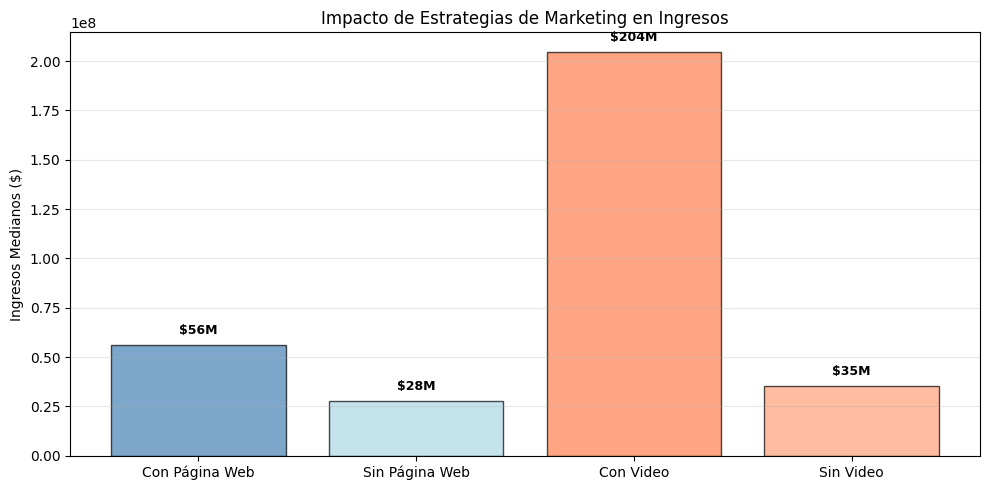

In [95]:
# Ejercicio 15: Estrategias de marketing
df = datos[(datos['revenue'] > 0)].copy()

print("="*60)
print("EJERCICIO 15: ESTRATEGIAS DE MARKETING")
print("="*60)

# Presencia en sitios web y vídeos
tiene_homepage = (df['homePage'].notna() & (df['homePage'] != '')).astype(int)
tiene_video = (df['video'].astype(bool) == True).astype(int)

print(f"\nPelículas analizadas: {len(df):,}")

print(f"\nCon página web oficial:")
print(f"  Cantidad: {tiene_homepage.sum():,}")
print(f"  Ingresos medianos: ${df[tiene_homepage==1]['revenue'].median():,.0f}")

print(f"\nSin página web oficial:")
print(f"  Cantidad: {(tiene_homepage==0).sum():,}")
print(f"  Ingresos medianos: ${df[tiene_homepage==0]['revenue'].median():,.0f}")

print(f"\nCon video disponible:")
print(f"  Cantidad: {tiene_video.sum():,}")
print(f"  Ingresos medianos: ${df[tiene_video==1]['revenue'].median():,.0f}")

print(f"\nSin video disponible:")
print(f"  Cantidad: {(tiene_video==0).sum():,}")
print(f"  Ingresos medianos: ${df[tiene_video==0]['revenue'].median():,.0f}")

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
estrategias = ['Con Página Web', 'Sin Página Web', 'Con Video', 'Sin Video']
ingresos = [
    df[tiene_homepage==1]['revenue'].median(),
    df[tiene_homepage==0]['revenue'].median(),
    df[tiene_video==1]['revenue'].median(),
    df[tiene_video==0]['revenue'].median()
]

colors = ['steelblue', 'lightblue', 'coral', 'lightsalmon']
ax.bar(estrategias, ingresos, color=colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Ingresos Medianos ($)')
ax.set_title('Impacto de Estrategias de Marketing en Ingresos')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(ingresos):
    ax.text(i, v + (max(ingresos) * 0.02), f'${v/1e6:.0f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

EJERCICIO 16: POPULARIDAD DEL ELENCO vs ÉXITO COMERCIAL

Películas analizadas: 5,319

Correlación popularidad actores vs revenue: 0.2242
Correlación popularidad actores vs popularity: 0.1707


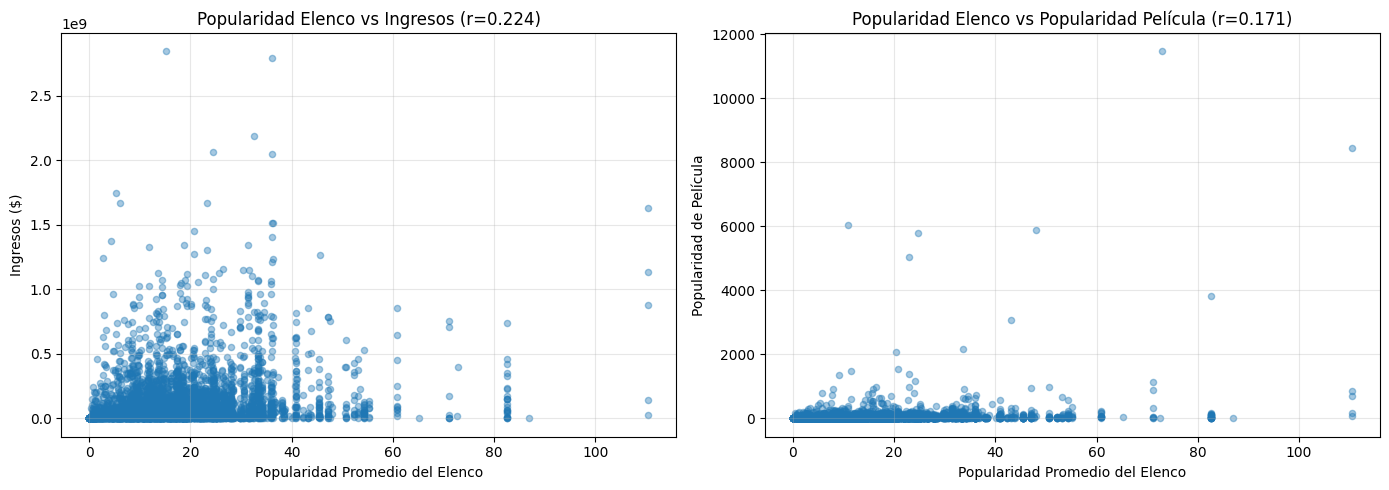

In [96]:
# Ejercicio 16: Popularidad del elenco vs éxito de taquilla
df = datos[(datos['revenue'] > 0) & (datos['actorsPopularity'].notna())].copy()

# Extraer popularidad promedio del elenco (primeros valores)
df['avg_actors_popularity'] = pd.to_numeric(df['actorsPopularity'].astype(str).str.split('|').str[0], errors='coerce')
df = df[df['avg_actors_popularity'] > 0]

print("="*60)
print("EJERCICIO 16: POPULARIDAD DEL ELENCO vs ÉXITO COMERCIAL")
print("="*60)

corr_actors_pop = df['avg_actors_popularity'].corr(df['revenue'])
corr_actors_pop2 = df['avg_actors_popularity'].corr(df['popularity'])

print(f"\nPelículas analizadas: {len(df):,}")
print(f"\nCorrelación popularidad actores vs revenue: {corr_actors_pop:.4f}")
print(f"Correlación popularidad actores vs popularity: {corr_actors_pop2:.4f}")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['avg_actors_popularity'], df['revenue'], alpha=0.4, s=20)
axes[0].set_xlabel('Popularidad Promedio del Elenco')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title(f'Popularidad Elenco vs Ingresos (r={corr_actors_pop:.3f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['avg_actors_popularity'], df['popularity'], alpha=0.4, s=20)
axes[1].set_xlabel('Popularidad Promedio del Elenco')
axes[1].set_ylabel('Popularidad de Película')
axes[1].set_title(f'Popularidad Elenco vs Popularidad Película (r={corr_actors_pop2:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## EJERCICIO 5: Puntos extras

### 1. ¿Cuáles son los 5 directores que han generado más ingresos totales?

In [97]:
# 1. ¿Cuáles son los 5 directores que han generado más ingresos totales?
ingresos_por_director = datos.groupby('director')['revenue'].sum().sort_values(ascending=False).head(5)
print("=" * 80)
print("TOP 5 DIRECTORES POR INGRESOS TOTALES")
print("=" * 80)
print(ingresos_por_director.map('{:,.2f}'.format).to_string())

TOP 5 DIRECTORES POR INGRESOS TOTALES
director
Steven Spielberg           9,770,792,563.00
James Cameron              7,663,972,816.00
Anthony Russo|Joe Russo    6,842,534,434.00
Peter Jackson              6,540,703,862.00
Michael Bay                6,451,728,504.00


### 2. ¿Cuál es el género cinematográfico más común?

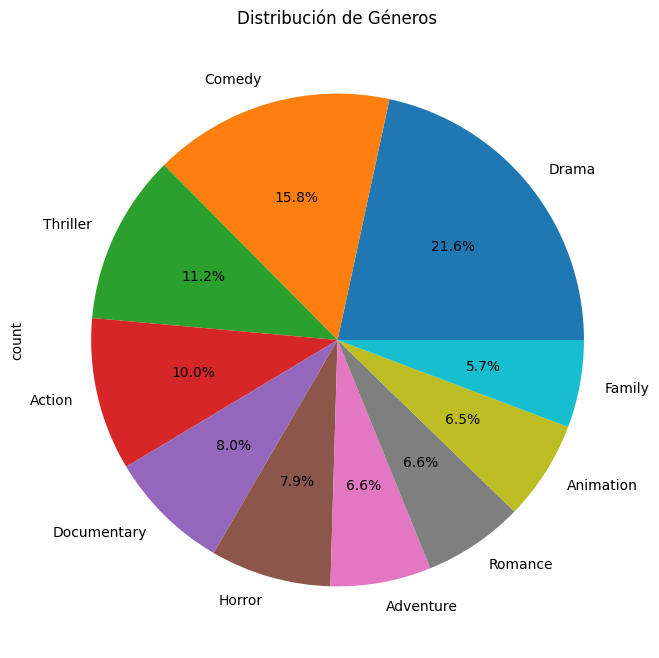

In [98]:
# 2. ¿Cuál es el género cinematográfico mas común?
generos_frecuentes = datos['genres'].str.split('|', expand=True).stack().value_counts().head(10)
generos_frecuentes.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Distribución de Géneros')
plt.show()

### 3. ¿Existe una correlación entre el presupuesto y el ingreso?

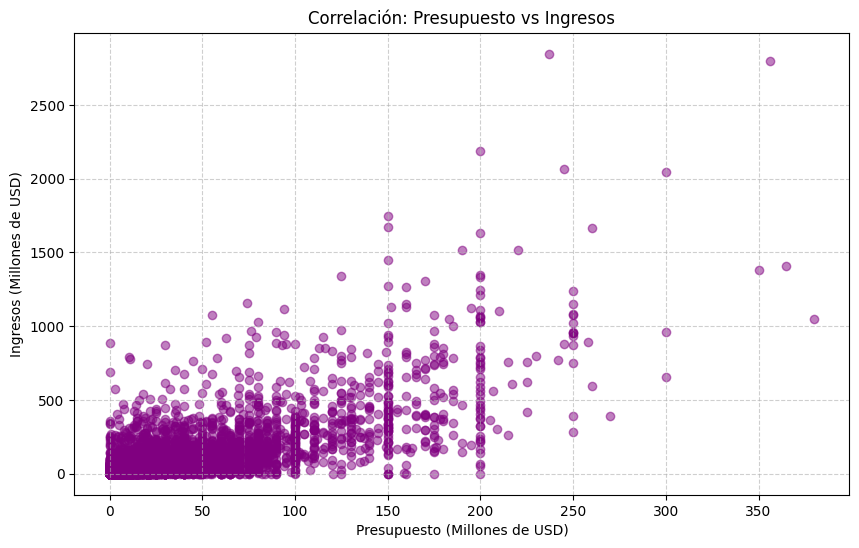

El coeficiente de correlación de Pearson es: 0.78


In [99]:
# 8. ¿Existe una correlación entre el presupuesto y el ingreso?
plt.figure(figsize=(10, 6))

# Dividimos entre 1,000,000 para medir en Millones de USD
presupuesto_milli = datos['budget'] / 1e6
ingresos_milli = datos['revenue'] / 1e6

plt.scatter(presupuesto_milli, ingresos_milli, alpha=0.5, color='purple')

plt.title('Correlación: Presupuesto vs Ingresos')
plt.xlabel('Presupuesto (Millones de USD)')
plt.ylabel('Ingresos (Millones de USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = datos['budget'].corr(datos['revenue'])
print(f"El coeficiente de correlación de Pearson es: {correlation:.2f}")

### 4. ¿Cuál es el promedio de duración de las películas por año?

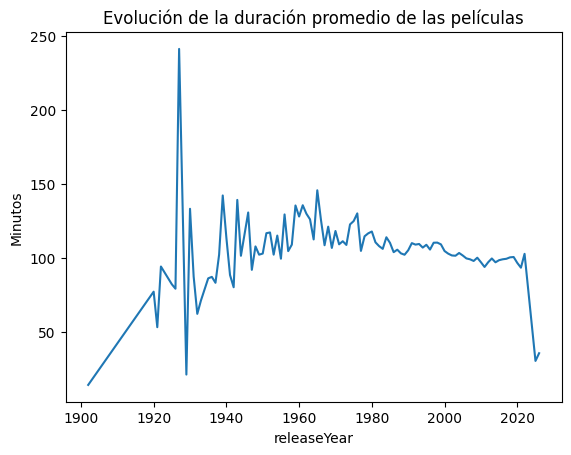

In [100]:
# 4. ¿Cuál es el promedio de duración de las películas por año?
duracion_por_año = datos.groupby('releaseYear')['runtime'].mean()
duracion_por_año.plot(kind='line', title='Evolución de la duración promedio de las películas')
plt.ylabel('Minutos')
plt.show()

### 5. ¿Qué productora ha realizado más películas?

In [101]:
# 5. ¿Qué productora ha realizado más películas?
productoras_frecuentes = datos['productionCompany'].str.split('|', expand=True).stack().value_counts().head(5)
print("=" * 80)
print("TOP 5 PRODUCTORAS POR CANTIDAD DE PELÍCULAS")
print("=" * 80)
print(productoras_frecuentes.to_string())

TOP 5 PRODUCTORAS POR CANTIDAD DE PELÍCULAS
Warner Bros. Pictures    481
Universal Pictures       467
Columbia Pictures        350
Paramount                320
20th Century Fox         310


### 6. ¿Cuáles son las 5 películas con el mejor "Retorno de Inversión"?

In [102]:
# 6. ¿Cuáles son las 5 películas con el mejor "Retorno de Inversión"?
datos['ROI'] = np.where(
    datos['budget'] > 0,
    (datos['revenue'] - datos['budget']) / datos['budget'],
    np.nan
)
top_5_roi = datos[['title', 'ROI']].sort_values(by='ROI', ascending=False).head(5)
print("=" * 80)
print("TOP 5 PELÍCULAS POR RETORNO DE INVERSIÓN")
print("=" * 80)
print(top_5_roi.to_string(index=False))

TOP 5 PELÍCULAS POR RETORNO DE INVERSIÓN
                    title          ROI
The Notorious Bettie Page 15674.311111
  The Blair Witch Project  4142.984983
    The Sugar creek beast  2141.857143
      Paranormal Activity   902.176902
              The Gallows   425.644100
